In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [46]:
from sklearn.datasets import make_blobs

In [47]:
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

In [48]:
x = points[:, 0]
y = points[:, 1]

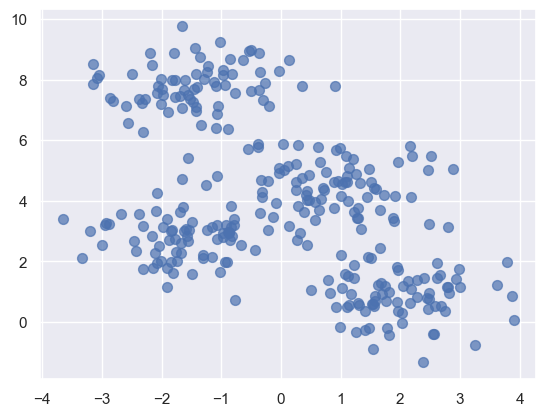

In [49]:
plt.scatter(x, y, s=50, alpha=0.7)

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=4, random_state=0)

In [52]:
predicted_cluster_indexes = kmeans.predict(points)
predicted_cluster_indexes

array([1, 3, 1, 3, 0, 0, 2, 1, 3, 3, 2, 3, 1, 3, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 0, 1, 2, 1, 1,
       2, 2, 3, 2, 3, 0, 2, 0, 3, 0, 0, 2, 3, 2, 3, 0, 3, 1, 3, 2, 2, 2,
       3, 0, 3, 2, 1, 1, 3, 2, 2, 3, 2, 1, 0, 3, 0, 1, 0, 0, 3, 1, 0, 1,
       3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 1, 2, 3, 0, 3, 0, 1, 0, 0, 1, 3, 1,
       2, 2, 0, 3, 0, 1, 3, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2,
       2, 0, 3, 2, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1,
       0, 2, 3, 2, 0, 1, 3, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 3, 0, 1, 2, 3,
       0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 3, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 3, 1, 2, 0, 2, 1, 3, 2, 3, 1, 3, 1, 2, 1, 1, 3, 2, 2, 0, 0, 1,
       3, 0, 0, 2, 0, 2, 1, 3, 3, 1, 1, 3, 1, 0, 2, 1, 0, 2, 3, 2, 0, 1,
       0, 3, 3, 3, 3, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 3, 1, 1, 2, 0,
       3, 2, 1, 3, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0,
       3, 1, 3, 1, 0, 0, 3, 3, 3, 0, 0, 1, 3, 2])

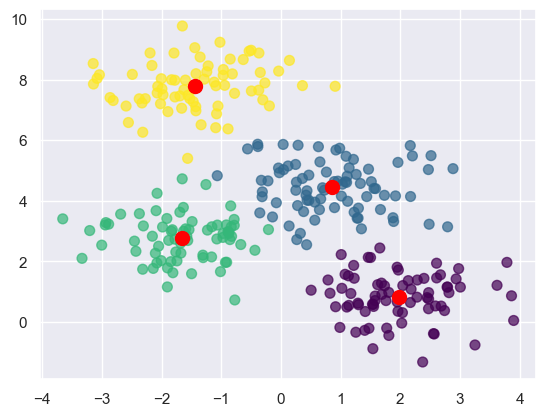

In [53]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

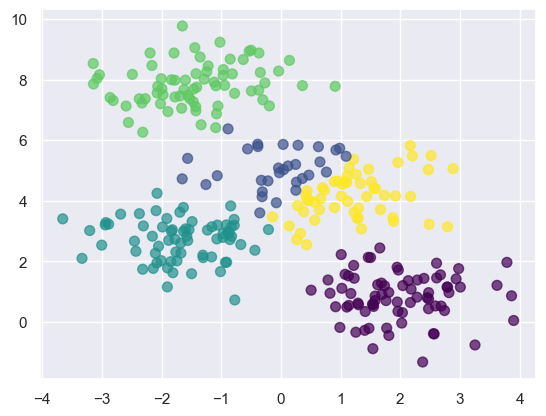

In [54]:
kmeans = KMeans(
    n_clusters=5, random_state=0
)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(
    points
)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')


In [55]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

c:\Users\achavan4\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

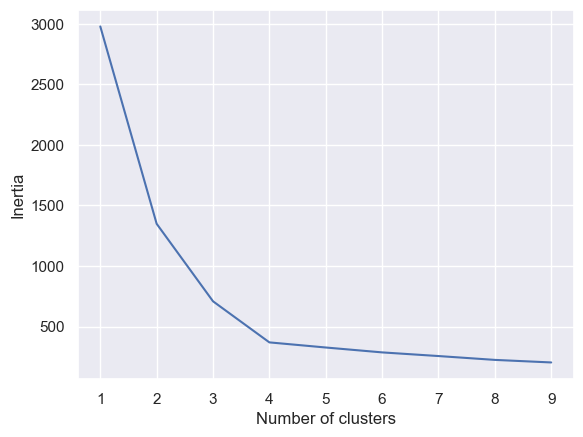

In [56]:
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [57]:
import pandas as pd

In [58]:
customers = pd.read_csv(
    "data/customers.csv"
)
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'Spending Score')

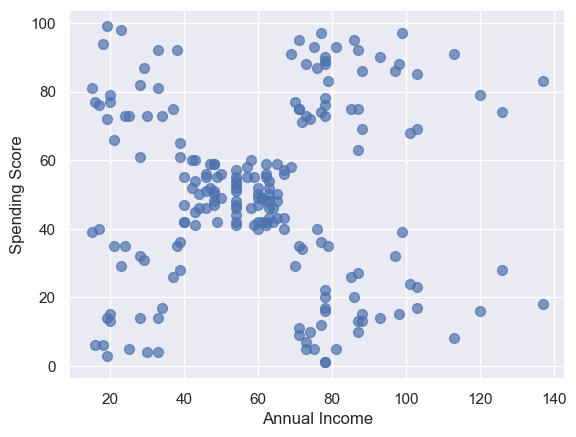

In [61]:
# plot annual income and spendin scores

# get annual income and spending score values
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

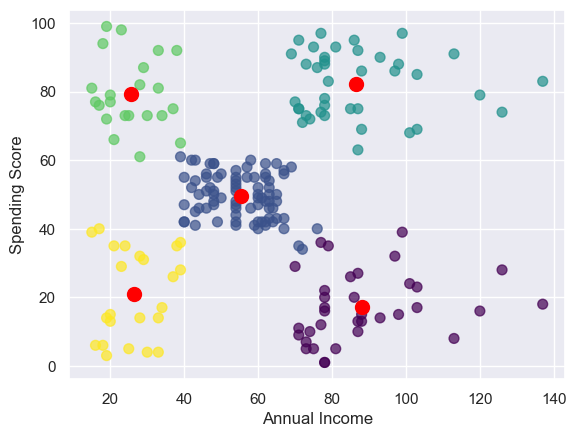

In [63]:
kmeans = KMeans(
    n_clusters=5, random_state=0
)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [64]:
df = customers.copy()

In [67]:
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [68]:
import numpy as np

In [70]:
# Get the cluster index for a customer with a high income
# and low spending score
cluster = kmeans.predict(
    np.array([[120, 20]])
)[0]

0

In [73]:
# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)

In [74]:
from sklearn.preprocessing import LabelEncoder

In [77]:
df = customers.copy()

In [78]:
encoder = LabelEncoder()

In [79]:
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [81]:
points = df.iloc[:, 1:5].values

In [82]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, random_state=0
    )
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

c:\Users\achavan4\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

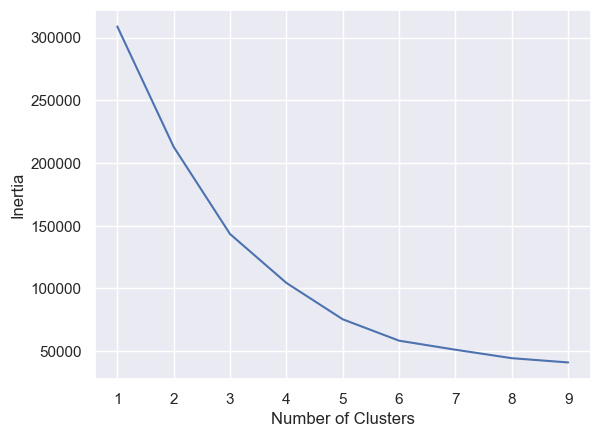

In [83]:
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [84]:
kmeans = KMeans(
    n_clusters=5, random_state=0
)
kmeans.fit(points)
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [86]:
results = pd.DataFrame(
    columns = [
        'Cluster', 'Average Age', 'Average Income', 'Average Spending Index',
        'Number of Females', 'Number of Males'
    ]
)

In [88]:
for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1] # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3] # Average spending score for current cluster
    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[1]
    results.loc[i] = ([i, age, income, spend, females, males])
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,6.0
1,1.0,32.692308,86.538462,82.128205,21.0,6.0
2,2.0,43.088608,55.291139,49.569620,46.0,6.0
3,3.0,40.666667,87.750000,17.583333,17.0,6.0
4,4.0,25.521739,26.304348,78.565217,14.0,6.0
